In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance.shape

(1338, 7)

In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# One-hot encoding for object data types - Sex, Smoker, Region

insurance_df = pd.get_dummies(insurance)

In [8]:
insurance_df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [9]:
# Creating X & y that is features & lables for our dataset

X = insurance_df.drop(['charges'], axis = 1)
y = insurance_df['charges']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=101)

In [11]:
X_train.shape, X_test.shape

((1070, 11), (268, 11))

In [12]:
from tensorflow.python.eager.monitoring import Metric
# Creating a neural Network

# Create a Model
model_insurance = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

# Compile the  Model
model_insurance.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics =['mae'])

# Fit the model
model_insurance.fit(X_train, y_train, epochs = 100)                      


Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 13381.9824 - mae: 13381.9824
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13381.9834 - mae: 13381.9834
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13381.9824 - mae: 13381.9824
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13381.9834 - mae: 13381.9834
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13381.9814 - mae: 13381.9814
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13381.9834 - mae: 13381.9834
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 13381.9834 - mae: 13381.9834
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 13381.9814 - mae: 13381.9814
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 13381.9824 - mae: 13381.9824
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 13381.98

In [13]:
model_insurance.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_insurance.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 12825.0117 - mae: 12825.0117


[12825.01171875, 12825.01171875]

In [15]:
# Lets create a model with extra layer



In [16]:
model_insurance_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100 , activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_insurance_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                          metrics = ['mae'])

history = model_insurance_2.fit(X_train, y_train, epochs = 400)

Epoch 1/400
34/34 [==============================] - 1s 3ms/step - loss: 13235.5566 - mae: 13235.5566
Epoch 2/400
34/34 [==============================] - 0s 2ms/step - loss: 10228.7012 - mae: 10228.7012
Epoch 3/400
34/34 [==============================] - 0s 2ms/step - loss: 7625.4565 - mae: 7625.4565
Epoch 4/400
34/34 [==============================] - 0s 3ms/step - loss: 7424.6470 - mae: 7424.6470
Epoch 5/400
34/34 [==============================] - 0s 3ms/step - loss: 7310.4194 - mae: 7310.4194
Epoch 6/400
34/34 [==============================] - 0s 2ms/step - loss: 7194.3872 - mae: 7194.3872
Epoch 7/400
34/34 [==============================] - 0s 2ms/step - loss: 7057.8145 - mae: 7057.8145
Epoch 8/400
34/34 [==============================] - 0s 2ms/step - loss: 6911.3223 - mae: 6911.3223
Epoch 9/400
34/34 [==============================] - 0s 2ms/step - loss: 6792.5806 - mae: 6792.5806
Epoch 10/400
34/34 [==============================] - 0s 2ms/step - loss: 6720.2261 - mae: 6720.

In [17]:
model_insurance_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               1200      
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 31,601
Trainable params: 31,601
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 0, 'epochs')

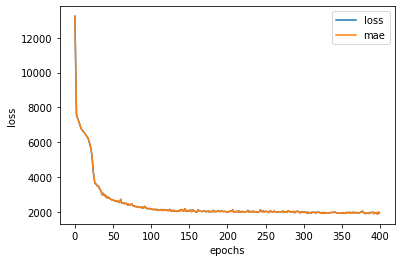

In [18]:
# Plot history also known as a loss curve or a training curve

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Preprocessing & Scalling/ Normalising Data

In [19]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [20]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

X = insurance.drop(['charges'], axis = 1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=101)

In [21]:
# Create a column transformer

ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']), # Turn these columns into min max scalar
    (OneHotEncoder(handle_unknown='ignore'), ["sex","smoker","region"])
)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training & test data with normalization MinMaxScaler & OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [22]:
X_train_normal[10]

array([0.26086957, 0.14126394, 0.2       , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

In [23]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Epoch 1/200
22/22 [==============================] - 1s 4ms/step - loss: 13378.9160 - mae: 13378.9160
Epoch 2/200
22/22 [==============================] - 0s 3ms/step - loss: 13359.6787 - mae: 13359.6787
Epoch 3/200
22/22 [==============================] - 0s 5ms/step - loss: 13316.9160 - mae: 13316.9160
Epoch 4/200
22/22 [==============================] - 0s 4ms/step - loss: 13264.1885 - mae: 13264.1885
Epoch 5/200
22/22 [==============================] - 0s 3ms/step - loss: 13201.5986 - mae: 13201.5996
Epoch 6/200
22/22 [==============================] - 0s 5ms/step - loss: 13127.3350 - mae: 13127.3350
Epoch 7/200
22/22 [==============================] - 0s 6ms/step - loss: 13040.8193 - mae: 13040.8193
Epoch 8/200
22/22 [==============================] - 0s 5ms/step - loss: 12941.7393 - mae: 12941.7393
Epoch 9/200
22/22 [==============================] - 0s 5ms/step - loss: 12829.8945 - mae: 12829.8945
Epoch 10/200
22/22 [==============================] - 0s 6ms/step - loss: 12705.17

Text(0.5, 0, 'epochs')

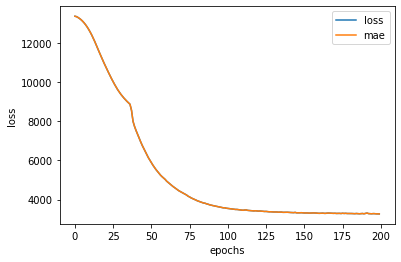

In [31]:
# Building a neural network model to fit on our normalised data

model_insurance_3 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(100, activation = 'relu' ),
    tf.keras.layers.Dense(100, activation = 'tanh' ),
    tf.keras.layers.Dense(100, activation = 'relu' ),
    tf.keras.layers.Dense(1, activation = 'linear')
])

model_insurance_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

history = model_insurance_3.fit(X_train_normal, y_train, epochs = 200, batch_size=50)

# Plot history also known as a loss curve or a training curve

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [32]:
X_train.shape, type(X_train)

((1070, 6), pandas.core.frame.DataFrame)

In [41]:
y_train.to_numpy().reshape(-1,1).shape, type(y_train.to_numpy())

((1070, 1), numpy.ndarray)

In [36]:
y_test.shape, type(y_test)

((268,), pandas.core.series.Series)

In [ ]:
# Scalling target

In [43]:
from sklearn.preprocessing import MinMaxScaler
target_scale = MinMaxScaler()
target_scale.fit(y_train.to_numpy().reshape(-1,1))

MinMaxScaler()

In [44]:
# transform target variables
y_train = target_scale.transform(y_train.to_numpy().reshape(-1,1))
y_test = target_scale.transform(y_test.to_numpy().reshape(-1,1))

Epoch 1/20
22/22 [==============================] - 1s 4ms/step - loss: 0.1022 - mae: 0.1022
Epoch 2/20
22/22 [==============================] - 0s 5ms/step - loss: 0.0605 - mae: 0.0605
Epoch 3/20
22/22 [==============================] - 0s 4ms/step - loss: 0.0544 - mae: 0.0544
Epoch 4/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0476 - mae: 0.0476
Epoch 5/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0475 - mae: 0.0475
Epoch 6/20
22/22 [==============================] - 0s 6ms/step - loss: 0.0449 - mae: 0.0449
Epoch 7/20
22/22 [==============================] - 0s 4ms/step - loss: 0.0444 - mae: 0.0444
Epoch 8/20
22/22 [==============================] - 0s 4ms/step - loss: 0.0421 - mae: 0.0421
Epoch 9/20
22/22 [==============================] - 0s 5ms/step - loss: 0.0445 - mae: 0.0445
Epoch 10/20
22/22 [==============================] - 0s 5ms/step - loss: 0.0393 - mae: 0.0393
Epoch 11/20
22/22 [==============================] - 0s 5ms/step - lo

Text(0.5, 0, 'epochs')

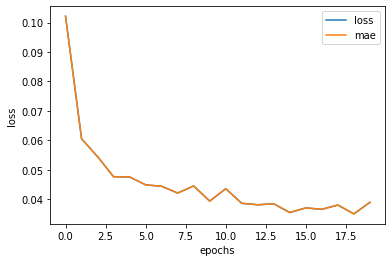

In [45]:
# Building a neural network model to fit on our normalised data

model_insurance_4 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(100, activation = 'relu' ),
    tf.keras.layers.Dense(100, activation = 'tanh' ),
    tf.keras.layers.Dense(100, activation = 'relu' ),
    tf.keras.layers.Dense(1, activation = 'linear')
])

model_insurance_4.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

history = model_insurance_4.fit(X_train_normal, y_train, epochs = 20, batch_size=50)

# Plot history also known as a loss curve or a training curve

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")